# Práctico final de curso "Astroestadística"

    El catálogo que se usará en el presente trabajo es el "All Sky Automated Survey for SuperNovae" (ASAS-SN), primer survey óptico capaz de monitorear el cielo en su totalidad desde la Tierra, alcanzando un límite de magnitud V=18. 
    Si bien el proyecto se enfoca principalmente en detectar supernovas brillantes, también ha descubierto una gran cantidad de estrellas variables de diversos tipos (Cefeidas, RR Lyrae, Rotacionales, entre otras). 
    Para este trabajo se utilizarán las binarias eclipsantes provenientes de dicho catálogo con el objetivo de clasificarlas en detached (EA), semi-detached (EB) y binarias de contacto (EW).
    La muestra a analizar consta de 84530 objetos. Además se empleará una muestra de entrenamiento de 70000 binarias eclipsantes provenientes del mismo catálogo.

# Análisis exploratorio de datos

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [10]:
tabla = pd.read_csv('train.csv')
muestra=pd.DataFrame(tabla)

Las muestras cuenta con 36 variables, cuyos nombres se detallan a continuación.

In [11]:
muestra.columns

Index(['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period',
       'variable_type', 'class_probability', 'phot_g_mean_mag',
       'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
       'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
       'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
       'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
       'w3_mag', 'e_w3_mag', 'w4_mag', 'e_w4_mag', 'w1_w2', 'w3_w4'],
      dtype='object')

Se eliminan todos los posibles valores NaN que existan en ambas tablas. Durante este paso se ignoran las columnas de error 'e_w3_mag' y 'e_w4_mag', dado que poseen muchos valores NaN, luego se decidirá cómo proseguir con ellas.

In [12]:
muestra = muestra.dropna(subset=['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period',
       'variable_type', 'class_probability', 'phot_g_mean_mag',
       'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
       'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
       'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
       'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
       'w3_mag','w4_mag', 'w1_w2', 'w3_w4'])

In [13]:
muestra.shape

(65260, 36)

Una vez eliminados tales objetos de la muestra, nos quedamos con un conjunto de 65260 objetos en la muestra de entrenamiento. El siguiente paso será representar las istribuciones de las distintas variables, con el objetivo de visualizar la posible existencia de valores atípicos.

In [14]:
muestra2=muestra[['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period','phot_g_mean_mag',
                  'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
                   'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
                   'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
                   'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
                   'w3_mag', 'w4_mag', 'w1_w2', 'w3_w4']]

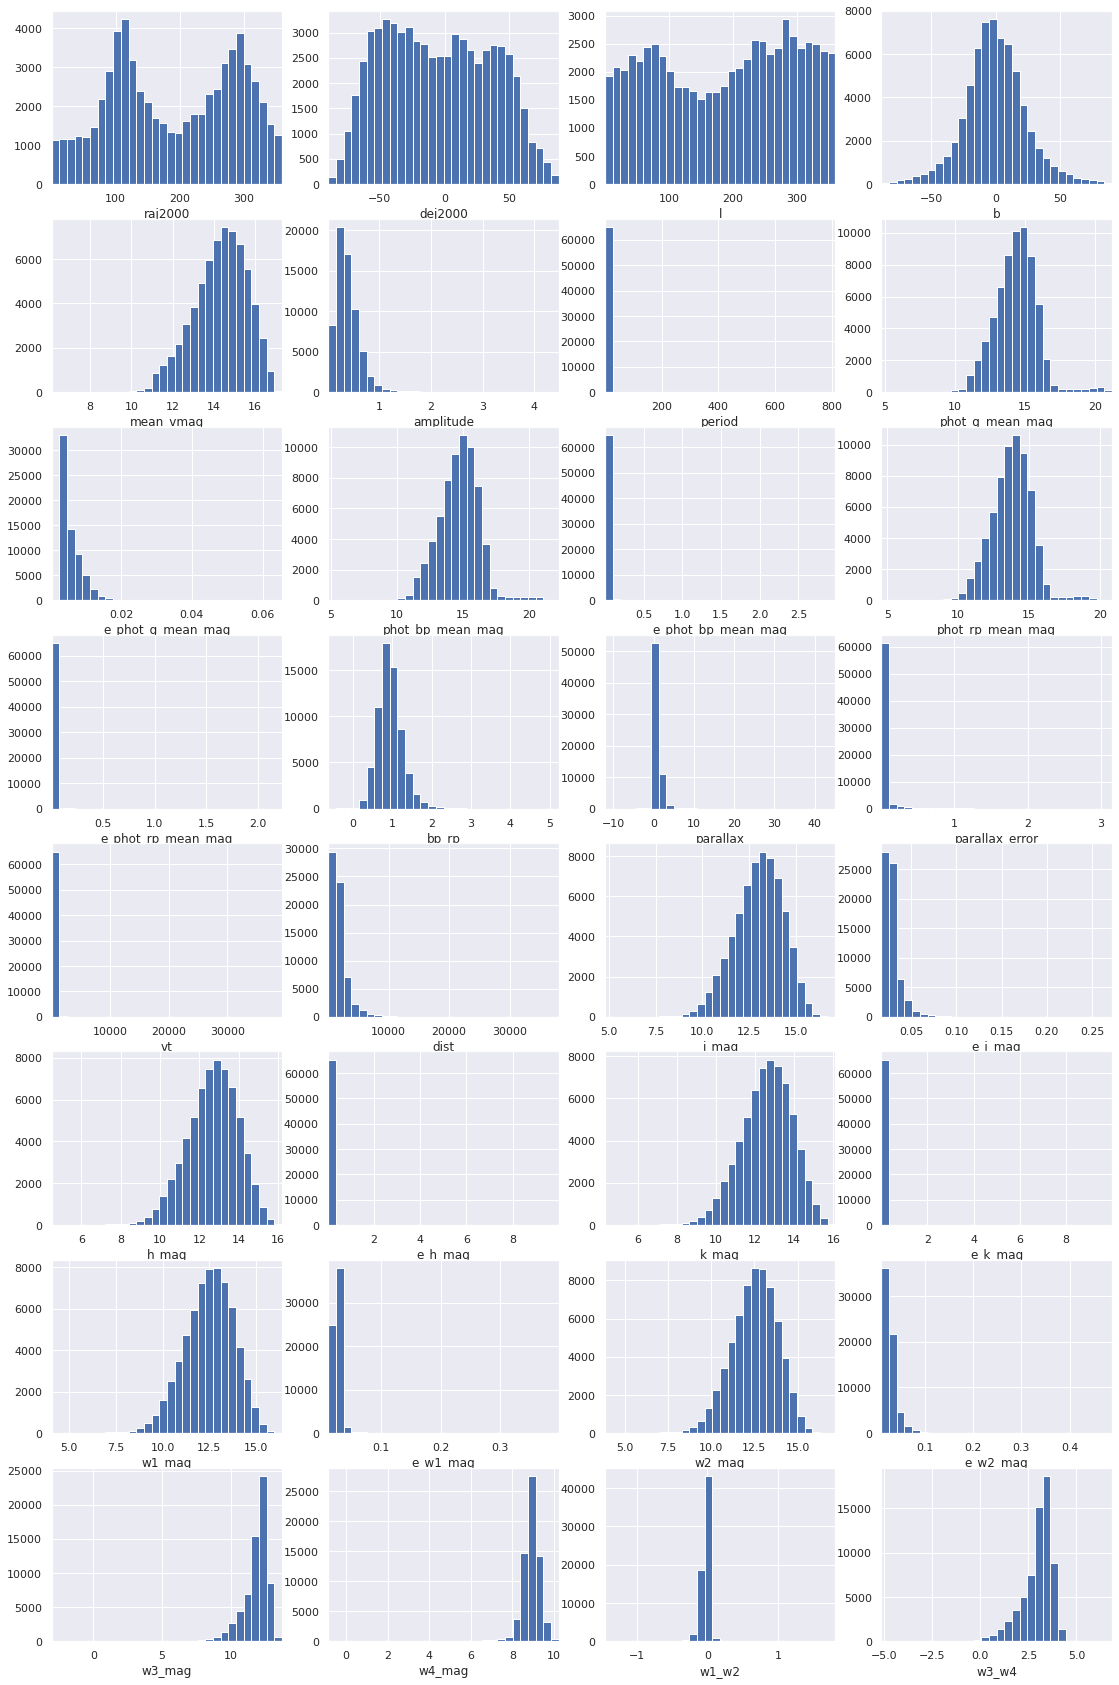

In [15]:
name=muestra2.columns
fig=plt.figure(figsize=(19,30))
fig.tight_layout()
for i in range (muestra2.shape[1]):
    x=muestra2[name[i]]
    ax=plt.subplot(8,4,i+1)
    ax.hist(x,bins=30)
    ax.set(xlabel=name[i])
    ax.set_xlim(min(x),max(x))

Se puede observar que para algunas variables existen ciertos valores que se pueden considerar outliers. Por ello se procederá a eliminar los objetos que posean dichos valores atípicos.

In [16]:
muestra3=muestra[['amplitude','period','e_phot_g_mean_mag','e_phot_bp_mean_mag',
       'e_phot_rp_mean_mag', 'parallax',
       'parallax_error', 'vt', 'dist','e_j_mag','e_h_mag',
       'e_k_mag', 'e_w1_mag', 'e_w2_mag',
       'w3_mag', 'w4_mag','w1_w2']]

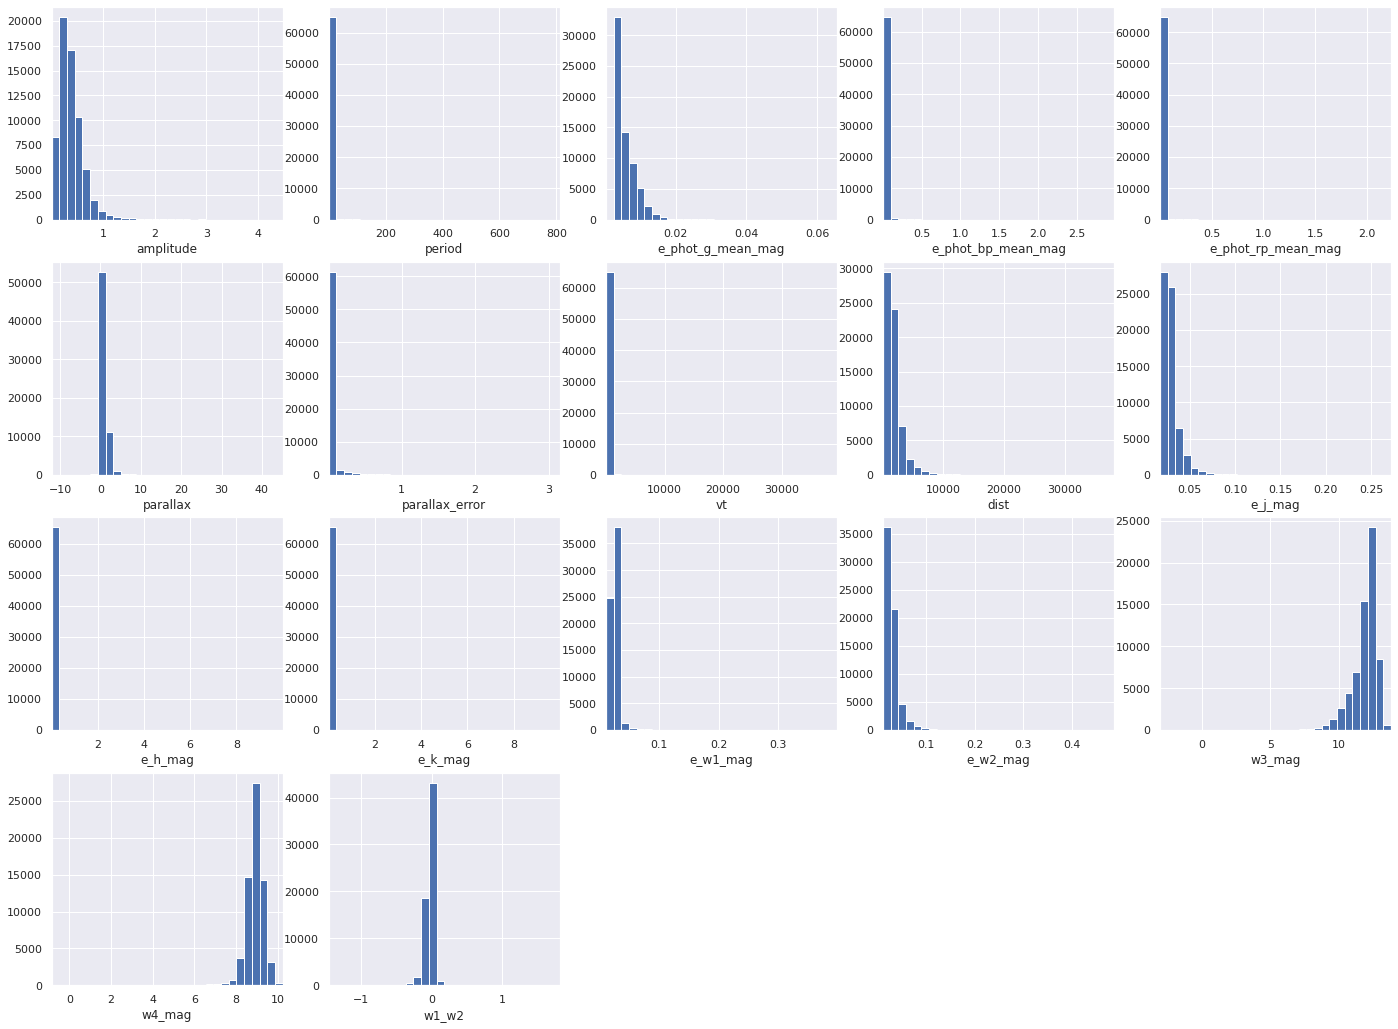

In [17]:
outliers=muestra3.columns
fig=plt.figure(figsize=(24,18))
fig.tight_layout()
for i in range (muestra3.shape[1]):
    x=muestra3[outliers[i]]
    ax=plt.subplot(4,5,i+1)
    ax.hist(x, bins=30)
    ax.set(xlabel=outliers[i])
    ax.set_xlim(min(x),max(x))

Elimino los valores atípicos de la muestra considerando solo los valores que se encuentren entre los percentiles 10 y 90:

In [18]:
for i in range (muestra3.shape[1]):
    q1= np.quantile(muestra[outliers[i]], 0.10)
    q3= np.quantile(muestra[outliers[i]], 0.90)
    minn=q1-1.5*(q3-q1)
    maxx=q3+1.5*(q3-q1)
    muestra=muestra[(muestra[outliers[i]] > minn)&(muestra[outliers[i]] < maxx)]

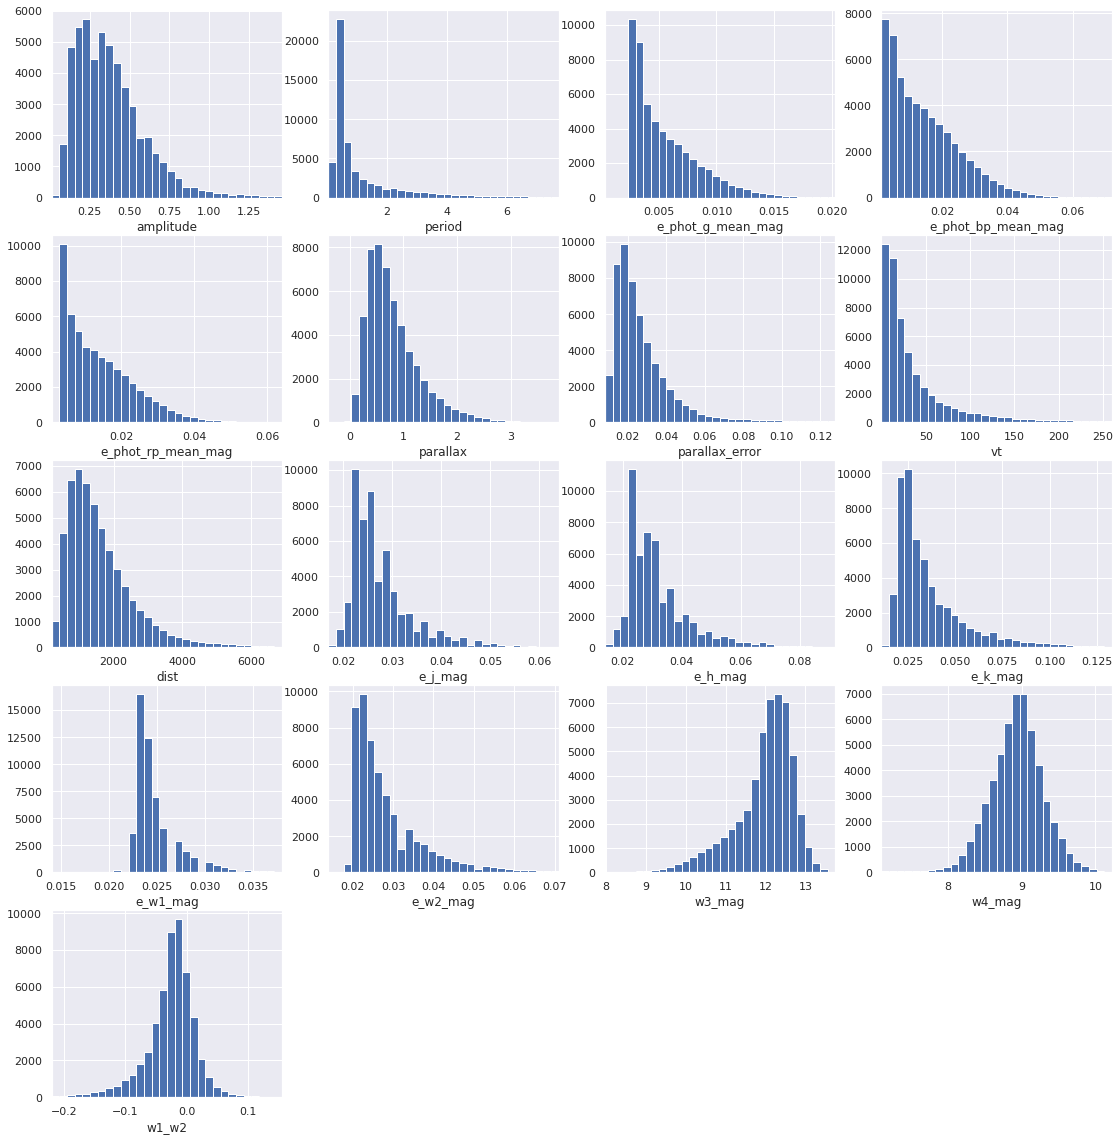

In [19]:
outliers=muestra3.columns
fig=plt.figure(figsize=(19,20))
fig.tight_layout()
for i in range (muestra3.shape[1]):
    x=muestra[outliers[i]]
    ax=plt.subplot(5,4,i+1)
    ax.hist(x, bins=30)
    ax.set(xlabel=outliers[i])
    ax.set_xlim(min(x),max(x))

Aún se observan valores atípicos en la variable 'period', por lo que haré un nuevo corte según esta variable, teniendo en cuenta solo los valores que se encuentren entre los percentiles 20 y 80:

Text(0.5, 0, 'Period')

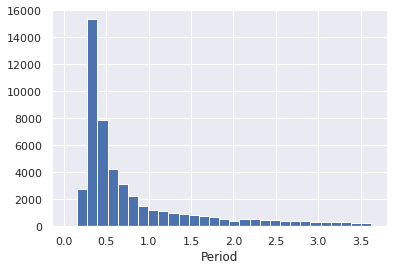

In [20]:
q1= np.quantile(muestra['period'], 0.20)
q3= np.quantile(muestra['period'], 0.80)
minn=q1-1.5*(q3-q1)
maxx=q3+1.5*(q3-q1)
muestra=muestra[(muestra['period'] > minn)&(muestra['period'] < maxx)]
plt.hist(muestra['period'],bins=30)
plt.xlabel('Period')

# Análisis PCA

Una vez conforme con los resultados, procedo a realizar el análisis PCA a la muestra. Para ello, se comienza por la visualización de media y varianza de las variables contenidas.

In [21]:
muestra2=muestra[['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period','phot_g_mean_mag',
                  'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
                   'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
                   'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
                   'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
                   'w3_mag', 'w4_mag', 'w1_w2', 'w3_w4']]

media=muestra2.mean(axis=0)
varianza=muestra2.var(axis=0)

df = pd.DataFrame()
df['Media']=media
df['Varianza']=varianza

df

,Media,Varianza
raj2000,189.904136,9684.453199
dej2000,-4.031672,1675.826380
l,185.986063,10958.716258
b,-0.846465,571.590559
mean_vmag,14.370167,1.469686
amplitude,0.375782,0.045081
period,0.844763,0.590760
phot_g_mean_mag,14.321969,1.531761
e_phot_g_mean_mag,0.005659,0.000008
phot_bp_mean_mag,14.684893,1.640872


  Es necesario estandarizar las variables dado que algunas tienen valores muy elevados (dist, vt) respecto al resto y podrían dominar las componentes principales al hacer el análisis PCA:

In [22]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [23]:
#Genero un pipeline que normalice los datos y le aplique el modelo PCA:

pipeline = make_pipeline(StandardScaler(), PCA())
pipeline.fit(muestra2)
pca = pipeline.named_steps['pca']  #extraigo modelo PCA

#Armo Dataframe con componentes principales para todos los objetos de la muestra

pca_data = pipeline.transform(muestra2)

Calculo el porcentaje de varianza acumulada explicada por las componentes principales para saber con cuántas me quedaré:

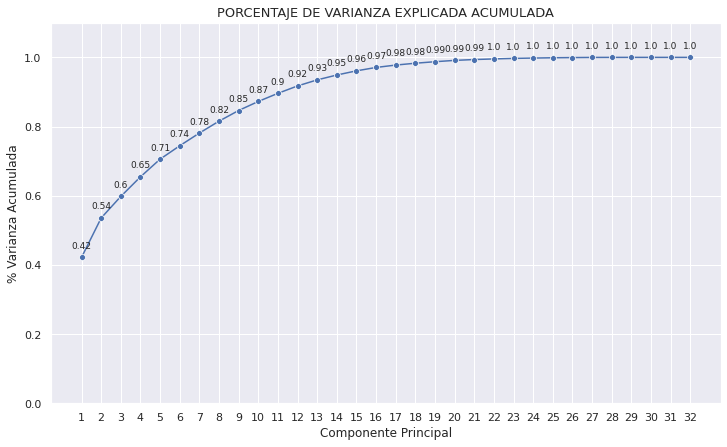

In [24]:
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
fig = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax = sns.lineplot(x=np.arange(len(muestra2.columns)) + 1, y=prop_varianza_acum, marker='o', data=pca, legend='brief')

for x, y in zip(np.arange(len(muestra2.columns))+1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(round(y, 2), (x,y), textcoords="offset points", xytext=(0,9), ha='center', fontsize=9)

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_)+1)
ax.set_title('PORCENTAJE DE VARIANZA EXPLICADA ACUMULADA', fontsize=13)
ax.set_xlabel('Componente Principal')
ax.set_ylabel('% Varianza Acumulada');

Del gráfico se puede observar que con 19 componentes principales se explica el 99% de los datos, por lo tanto reduzco la dimensionalidad de la siguiente manera:

In [25]:
pipeline = make_pipeline(StandardScaler(), PCA(n_components=19))
pipeline.fit(muestra2)
pca_data = pipeline.transform(muestra2)
pca_data=pd.DataFrame(pca_data)

In [26]:
pca_transf=pd.DataFrame(pipeline.fit_transform(pca_data))
pca_transf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.983278,0.296944,-0.368554,-1.124646,-0.593094,1.055218,0.945641,-0.407293,-0.130673,-0.961071,-0.264322,2.092408,1.370549,2.802443,-0.036162,1.936532,-1.294119,0.226760,0.241344
1,-1.341777,-0.391399,0.457054,-0.801160,-0.155357,-0.780724,0.086925,1.176289,-0.730935,-0.746440,-0.161093,0.870499,-2.290911,0.385589,0.247973,0.036355,-0.443422,0.158384,-0.805833
2,-0.288076,-0.112562,1.096038,-0.464987,-1.216333,-0.338366,-0.202135,-0.140586,-1.465906,-0.024680,-0.792423,-0.176866,-1.099126,-0.599958,0.073956,2.046928,-0.470463,1.252644,-0.831160
3,0.531976,-0.290992,1.111926,-0.168420,0.752879,0.913411,-1.264612,-1.372486,-0.017276,0.183636,-0.996777,0.652287,-1.197735,-0.265611,0.423461,0.359537,0.344386,0.655905,-1.212476
4,0.488786,0.529116,-0.791421,-0.353393,-0.241340,0.197201,-0.181488,-1.125852,0.033906,1.231258,0.446558,0.776460,0.028777,-1.120918,-0.198585,-0.745984,0.193455,-0.806773,-1.669263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49689,-1.163129,0.282879,-0.586605,-0.699215,-0.534300,-0.318026,0.167841,-2.498295,-0.023759,-0.068746,-2.074965,0.236167,-0.270841,-0.852459,1.217363,0.180730,0.104369,-1.268265,0.031028
49690,0.854412,0.750501,-1.247708,-1.410213,0.665921,0.599439,1.550727,1.689165,-0.893116,0.137783,-1.080629,-1.584095,0.335340,0.279735,0.940581,-1.043949,-1.368806,0.180108,0.095157
49691,0.119003,1.233645,0.002951,-0.853376,-1.475521,0.015117,-0.693427,-0.113394,1.036128,-0.334572,-0.181005,-1.493365,-0.586112,1.724934,0.222708,1.581231,0.247015,1.113304,-0.275583
49692,0.630747,0.641940,-0.912843,2.161304,2.353386,0.780816,-0.065330,2.097778,-0.702157,3.478170,2.620704,0.497789,-0.802724,0.272067,-1.927636,-1.666585,-0.622324,0.222600,1.288084


In [27]:
# Creo un dataframe con la contribución de cada variable a cada una de las 32 componentes principales.

componentes=pd.DataFrame(abs(pca.components_),columns=muestra2.columns)

# Extraigo el máximo valor en valor absoluto de la contribución de cada variable, armo un dataframe y los ordeno
# de mayor a menor. De esta forma puedo visualizar cuales son las 19 variables que contribuyen en mayor medida a 
# la representación de los datos originales.

comp2=pd.DataFrame(componentes.max(),columns=['max']).sort_values(by=['max'],ascending=False)
comp2['indice']=np.arange(len(comp2))
comp3=comp2[(comp2.indice <= 18)]
comp3.index #Estas son las variables que más contribuyen a la representación de los datos originales

Index(['mean_vmag', 'h_mag', 'e_w2_mag', 'b', 'e_phot_g_mean_mag',
       'phot_bp_mean_mag', 'e_phot_bp_mean_mag', 'j_mag', 'phot_rp_mean_mag',
       'l', 'e_phot_rp_mean_mag', 'phot_g_mean_mag', 'k_mag', 'dej2000',
       'w4_mag', 'raj2000', 'parallax_error', 'e_h_mag', 'vt'],
      dtype='object')

In [28]:
# Finalmente creo un dataframe con la muestra que se utilizará para aplicar el algoritmo de Machine Learning, la
# cual contiene únicamente las 19 variables previamente seleccionadas:

muestra_pca=muestra2[['b', 'l', 'w4_mag', 'dej2000', 'parallax_error', 'raj2000', 'e_h_mag',
       'vt', 'parallax', 'e_w1_mag', 'w1_w2', 'amplitude', 'e_k_mag',
       'e_j_mag', 'dist', 'bp_rp', 'period', 'e_phot_bp_mean_mag',
       'e_phot_g_mean_mag']]

# Proceso de clasificación con Machine Learning

Separo la muestra de entrenamiento en dos submuestras: una posee la clasificación de cada elemento de la muestra, y la otra posee el resto de las variables.

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [30]:
muestra_a= muestra_pca
muestra_b= muestra[['variable_type']]

Convierto las etiquetas de clasificación en variables categóricas:

In [31]:
le = LabelEncoder()
muestra_b = muestra_b.apply(le.fit_transform)

Divido la muestra en una muestra de entrenamiento y una muestra de testeo:

In [32]:
train_1, test_1 = train_test_split(muestra_a, train_size=0.8, shuffle=True, random_state=7654)
train_2, test_2 = train_test_split(muestra_b, train_size=0.8, shuffle=True, random_state=7654)

Una vez que tengo listas las muestras a utilizar, procedo a entrenar diferentes modelos de clasificación de scikit learn para decidir cuál es el que mejor se ajusta a mi muestra de datos:

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
LSVM = LinearSVC()
NLSVM = SVC(kernel='rbf')
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [35]:
LR_fit = LR.fit(train_1, train_2.values.ravel())
KNN_fit = KNN.fit(train_1, train_2.values.ravel())
NB_fit = NB.fit(train_1, train_2.values.ravel())
LSVM_fit = LSVM.fit(train_1, train_2.values.ravel())
NLSVM_fit = NLSVM.fit(train_1, train_2.values.ravel())
DT_fit = DT.fit(train_1, train_2.values.ravel())
RF_fit = RF.fit(train_1, train_2.values.ravel())

/home/paula/anaconda3/envs/astroestad/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/paula/anaconda3/envs/astroestad/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Empleo los modelos entrenados en la muestra de testeo y calculo el procentaje de precisión de cada uno:

In [36]:
LR_pred = LR_fit.predict(test_1)
KNN_pred = KNN_fit.predict(test_1)
NB_pred = NB_fit.predict(test_1)
LSVM_pred = LSVM_fit.predict(test_1)
NLSVM_pred = NLSVM_fit.predict(test_1)
DT_pred = DT_fit.predict(test_1)
RF_pred = RF_fit.predict(test_1)

In [37]:
from sklearn.metrics import accuracy_score
print("EL porcentaje de precisión del modelo Logistic Regression es %f" % (accuracy_score(LR_pred, test_2)*100))
print("EL porcentaje de precisión del modelo KNN es %f" % (accuracy_score(KNN_pred, test_2)*100))
print("EL porcentaje de precisión del modelo Naive Bayes es %f" % (accuracy_score(NB_pred, test_2)*100))
print("EL porcentaje de precisión del modelo Linear SVMs es %f" % (accuracy_score(LSVM_pred, test_2)*100))
print("EL porcentaje de precisión del modelo Non Linear SVMs es %f" % (accuracy_score(NLSVM_pred, test_2)*100))
print("EL porcentaje de precisión del modelo Decision Trees es %f" % (accuracy_score(DT_pred, test_2)*100))
print("EL porcentaje de precisión del modelo Random Forests es %f" % (accuracy_score(RF_pred, test_2)*100))

EL porcentaje de precisión del modelo Logistic Regression es 57.259282
EL porcentaje de precisión del modelo KNN es 48.777543
EL porcentaje de precisión del modelo Naive Bayes es 72.874535
EL porcentaje de precisión del modelo Linear SVMs es 74.745950
EL porcentaje de precisión del modelo Non Linear SVMs es 56.967502
EL porcentaje de precisión del modelo Decision Trees es 76.979575
EL porcentaje de precisión del modelo Random Forests es 83.881678


El modelo con mayor procentaje de precisión es el Random Forests, por lo tanto será el modelo que aplicaré a los datos nuevos. Grafico la matriz de confusión normalizada para saber con qué porcentaje de certeza está clasificando cada tipo de binaria:

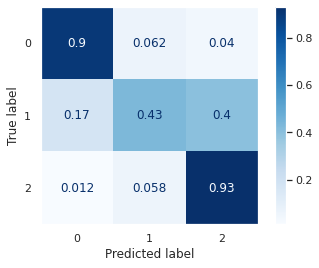

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(RF_fit, test_1, test_2, cmap=plt.cm.Blues, normalize='true')
plt.grid(False)

Dado que el porcentaje de precisión de una de las opciones de clasificación no es suficientemente confiable, busco mejorar los hiperparámetros del modelo Random Forest para mejorar los resultados:

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
n_est= list(range(600, 900,50))
max_d=list(range(10, 20))
min_split= list(range(2, 12))
min_leaf=list(range(1,8))
weight_options = ['balanced', 'balanced_subsample']

In [41]:
#Expreso la distribución de hiperparámetros de la siguiente manera:
param_dist = dict(n_estimators=n_est, max_depth=max_d, min_samples_split=min_split, min_samples_leaf=min_leaf, class_weight=weight_options)

In [42]:
rand = RandomizedSearchCV(RF, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=234)
rand.fit(muestra_a, muestra_b.values.ravel())
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.810882,0.004210,"{'n_estimators': 650, 'min_samples_split': 2, ..."
1,0.790940,0.003839,"{'n_estimators': 750, 'min_samples_split': 8, ..."
2,0.798165,0.003962,"{'n_estimators': 650, 'min_samples_split': 11,..."
3,0.798909,0.004685,"{'n_estimators': 750, 'min_samples_split': 6, ..."
4,0.807502,0.004204,"{'n_estimators': 800, 'min_samples_split': 8, ..."
5,0.815491,0.004608,"{'n_estimators': 750, 'min_samples_split': 4, ..."
6,0.787117,0.004180,"{'n_estimators': 850, 'min_samples_split': 7, ..."
7,0.803859,0.004337,"{'n_estimators': 700, 'min_samples_split': 2, ..."
8,0.794965,0.004578,"{'n_estimators': 700, 'min_samples_split': 5, ..."
9,0.809434,0.004409,"{'n_estimators': 650, 'min_samples_split': 9, ..."


In [43]:
print(rand.best_score_)
print(rand.best_params_)

0.8154905403440973
{'n_estimators': 750, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 19, 'class_weight': 'balanced'}


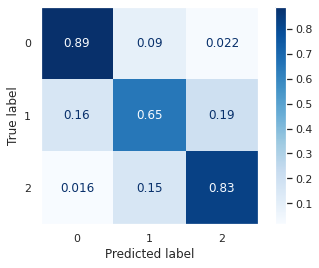

In [59]:
RF = RandomForestClassifier(n_estimators=750, max_depth=19, min_samples_split=4, min_samples_leaf=5, class_weight='balanced_subsample')
RF_fit = RF.fit(train_1, train_2.values.ravel())

disp = ConfusionMatrixDisplay.from_estimator(RF_fit, test_1, test_2, cmap=plt.cm.Blues, normalize='true')
plt.grid(False)

Una vez conforme con el modelo entrenado, procedo a aplicar el mismo a una muestra de 84530 datos que no poseen clasificación:

In [60]:
tabla2 = pd.read_csv('binaries.csv')
tabla2=pd.DataFrame(tabla2)

Considero las mismas variables que se usaron para la muestra de entrenamiento y testeo:

In [61]:
muestra=tabla2[['b', 'l', 'w4_mag', 'dej2000', 'parallax_error', 'raj2000', 'e_h_mag',
       'vt', 'parallax', 'e_w1_mag', 'w1_w2', 'amplitude', 'e_k_mag',
       'e_j_mag', 'dist', 'bp_rp', 'period', 'e_phot_bp_mean_mag',
       'e_phot_g_mean_mag']]

In [62]:
muestra = muestra.dropna(subset=['b', 'l', 'w4_mag', 'dej2000', 'parallax_error', 'raj2000', 'e_h_mag',
       'vt', 'parallax', 'e_w1_mag', 'w1_w2', 'amplitude', 'e_k_mag',
       'e_j_mag', 'dist', 'bp_rp', 'period', 'e_phot_bp_mean_mag',
       'e_phot_g_mean_mag'])

In [63]:
muestra.shape

(78917, 19)

Aplico el modelo Random Forests a la muestra nueva:

In [64]:
RF_pred = RF_fit.predict(muestra)